In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("/Users/simonponce/Desktop/AI Bootcamp /Starter_Code11/CryptoClustering/Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
StandardScaler().fit(market_data_df)


StandardScaler()

In [5]:
# Create a DataFrame with the scaled data
market_data_scaled = pd.DataFrame(market_data_df) 


# Copy the crypto names from the original data
market_data_scaled["coin_id"] = market_data_df.index

# Set the coinid column as index
market_data_scaled.set_index("coin_id", inplace=True)

# Display sample data
market_data_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
best_val=[] 

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(market_data_scaled)
    best_val.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": best_val}   



# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df.head(5)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

,k,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.592707e+06
3,4,8.352274e+05
4,5,4.373295e+05


<Axes: title={'center': 'Value 4 K'}, xlabel='k'>

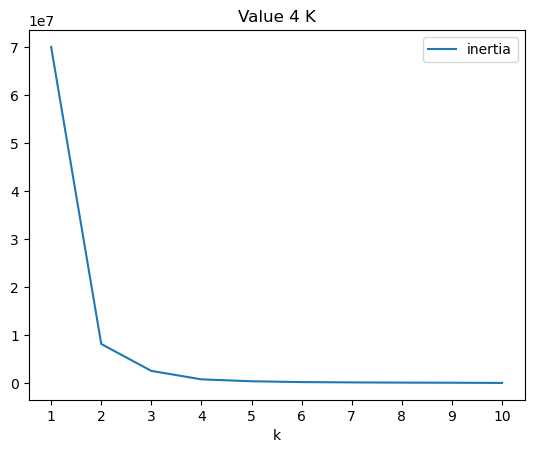

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k", y="inertia", title="Value 4 K", xticks=k_values)



#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for 'k' will be 4, at the end of the crease of the elbow

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

model

KMeans(n_clusters=4, random_state=0)

In [9]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
#market_data_df_scaled["coin"] = model.predict(market_data_df_scaled)


# View the resulting array of cluster values.
import numpy as np
cluster_labels = model.predict(market_data_scaled)
cluster_labels = np.array(cluster_labels)
print(cluster_labels)


[0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 0 3 3 2
 0 0 0 3]


In [11]:
# Create a copy of the DataFrame
clustered_df = market_data_scaled.copy()
display(clustered_df.head())
display(clustered_df.tail())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
celsius-degree-token,2.51323,0.60354,24.23919,140.79570,223.06437,1590.19149,2009.72217
ontology,-1.35845,-1.21399,-10.56222,-34.70548,-32.70004,54.76717,-12.65493
ftx-token,0.83416,7.10438,-0.20629,-10.56394,5.90295,57.48950,168.37251
true-usd,-0.06197,0.16642,0.10974,0.03090,0.25154,-0.08874,0.40617
digibyte,2.97084,0.67038,-7.31941,13.25354,-31.09030,482.58918,184.38014


In [12]:
# Add a new column to the DataFrame with the predicted clusters
#clustered_df ["coin"] = clustered_df.dropna('coin') 
clustered_df["clusters"] = model.labels_


# Display sample data
clustered_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


<Axes: title={'center': 'Clusters using K-Means'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

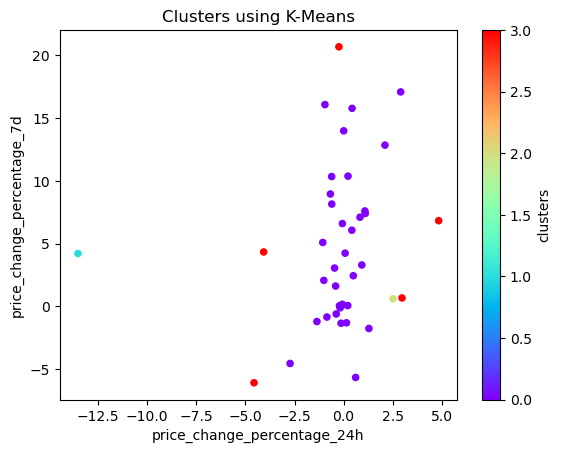

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot.scatter(x="price_change_percentage_24h", 
                          y="price_change_percentage_7d", 
                          c="clusters", 
                          colormap="rainbow", 
                          title="Clusters using K-Means")


### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_scaled)


# View the first five rows of the DataFrame. 
market_data_pca[:5]


array([[-341.80096268,  -51.36677548,   12.52547089],
       [-249.42046633,   24.11754777,  -14.23146597],
       [-402.61472077, -118.71073742,   24.83839662],
       [-406.75243715,  -79.48728629,    1.56633057],
       [-382.42994789, -103.43195906,   16.75307273]])

In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_ * 10000+6
explained_variance


array([9766.37313006,  236.2829491 ,   13.48308214])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you  
pcs_df = pd.DataFrame(
    data=market_data_pca, columns=["PCA1", "PCA2", "PCA3"], index=market_data_scaled.index
)

# Creating a DataFrame with the PCA data    
pcs_df.head()


# Copy the crypto names from the original data
pcs_df["coin_id"] = market_data_df.index


# Set the coinid column as index
pcs_df.set_index("coin_id", inplace=True)


# Display sample data
pcs_df.head()


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-341.800963,-51.366775,12.525471
ethereum,-249.420466,24.117548,-14.231466
tether,-402.614721,-118.710737,24.838397
ripple,-406.752437,-79.487286,1.566331
bitcoin-cash,-382.429948,-103.431959,16.753073


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(pcs_df)
    inertia.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df.head()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

,k,inertia
0,1,6.997052e+07
1,2,8.180192e+06
2,3,2.580721e+06
3,4,8.237471e+05
4,5,4.264175e+05


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

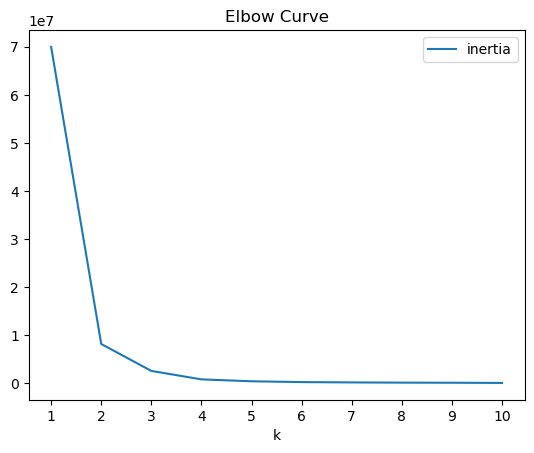

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k_values)


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best Value for 'k' will be 4 in the X line


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ from the best value for k, I think i am doing somehting wrong

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=0)


In [21]:
# Fit the K-Means model using the PCA data
model.fit(pcs_df)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [22]:
# Remove the "clusters" column from the DataFrame
#pcs_df.drop(["clusters"], axis=1, inplace=True)

# Predict the clusters to group the cryptocurrencies using the PCA data
#cluster_labels = model.predict(pcs_df)

if "clusters" in pcs_df.columns:
    pcs_df.drop(["clusters"], axis=1, inplace=True)
    # Predict the clusters to group the cryptocurrencies using the PCA data
    cluster_labels = model.predict(pcs_df)
else:
    print("Column 'clusters' not found in the DataFrame.")


Column 'clusters' not found in the DataFrame.


In [23]:
clustered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
 7   clusters                      41 non-null     int32  
dtypes: float64(7), int32(1)
memory usage: 3.8+ KB


In [24]:
# Create a copy of the DataFrame with the PCA data
clustered_df = pcs_df.copy()


# Add a new column to the DataFrame with the predicted clusters
clustered_df["clusters"] = model.labels_


# Display sample data
display(clustered_df.head(20))
display(clustered_df.tail(20))


,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-341.800963,-51.366775,12.525471,0
ethereum,-249.420466,24.117548,-14.231466,0
tether,-402.614721,-118.710737,24.838397,0
ripple,-406.752437,-79.487286,1.566331,0
bitcoin-cash,-382.429948,-103.431959,16.753073,0
binancecoin,-289.125020,12.287170,34.163848,0
chainlink,28.151408,154.987995,-73.126506,0
cardano,-174.519832,80.243493,-30.392830,0
litecoin,-406.613342,-91.783029,5.016144,0


,PCA1,PCA2,PCA3,clusters
coin_id,,,,
wrapped-bitcoin,-341.672172,-51.088157,12.046052,0
leo-token,-377.733744,-110.558329,16.228922,0
huobi-token,-366.548441,-87.255215,14.133475,0
nem,-145.551343,37.211474,69.779081,0
binance-usd,-402.470760,-118.671238,24.689086,0
iota,-378.208662,-34.321847,-25.265565,0
vechain,-128.539445,65.675378,-59.716008,0
zcash,-286.959559,-31.013635,-7.990442,0
theta-token,532.124138,516.120826,-13.315019,0


In [25]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
from bokeh.models import HoverTool
import hvplot.pandas as hvPlot

scatter_plot = clustered_df.hvplot.scatter(x="PCA1", y="PCA2", by="clusters", title="Clusters using K-Means", hover_cols=["coin_id"])
scatter_plot



:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [26]:
# Use the columns from the original scaled DataFrame as the index.
pcs_df = pd.DataFrame(
    data=market_data_pca, columns=["PCA1", "PCA2", "PCA3"], index=market_data_scaled.index
)
pcs_df


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-341.800963,-51.366775,12.525471
ethereum,-249.420466,24.117548,-14.231466
tether,-402.614721,-118.710737,24.838397
ripple,-406.752437,-79.487286,1.566331
bitcoin-cash,-382.429948,-103.431959,16.753073
binancecoin,-289.125020,12.287170,34.163848
chainlink,28.151408,154.987995,-73.126506
cardano,-174.519832,80.243493,-30.392830
litecoin,-406.613342,-91.783029,5.016144


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Cording to my data both feautres look the same and will bahave the same. The influence will be nagative in case I made a mistake. 
    